In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r"D:\Git\aa_project\Data\frankfurt_final.csv")
df_w = pd.read_csv(r"D:\Git\aa_project\Data\frankfurt_weather.csv")

In [3]:
df.head()

,Unnamed: 0,day,year,month,date,hour,min,weekday,weekday_str,b_number,city,trip_duration,distance,orig_lat,orig_lng,dest_lat,dest_lng
0,0,2019-06-25 21:51:00,2019,6,25,21,51,2,Tuesday,11420,frankfurt,7,0.715,49.991072,8.412515,49.984942,8.409474
1,1,2019-06-26 06:33:00,2019,6,26,6,33,3,Wednesday,11420,frankfurt,14,1.087,49.984942,8.409474,49.985673,8.424641
2,2,2019-06-27 13:20:00,2019,6,27,13,20,4,Thursday,11420,frankfurt,7,0.010,49.985613,8.424448,49.985538,8.424533
3,3,2019-06-27 13:30:00,2019,6,27,13,30,4,Thursday,11420,frankfurt,4,0.018,49.985528,8.424512,49.985679,8.424603
4,4,2019-06-27 13:59:00,2019,6,27,13,59,4,Thursday,11420,frankfurt,9,0.005,49.985679,8.424603,49.985636,8.424570


In [4]:
df.drop(columns = ["weekday_str", "city", "Unnamed: 0", "day"], inplace = True)

In [5]:
df_hour_duration = df[["hour", "trip_duration"]]

In [6]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, init='k-means++').fit(df_hour_duration)
                for k in range(2, 12)]

inertias = [model.inertia_ for model in kmeans_per_k]

print(inertias)

[5590123.512237287, 2869097.7668539817, 1934104.1686630237, 1383872.9415656894, 1141136.6167079476, 908694.5533913882, 763446.1776682809, 670890.5641635254, 593542.1288120355, 526266.2654648104]


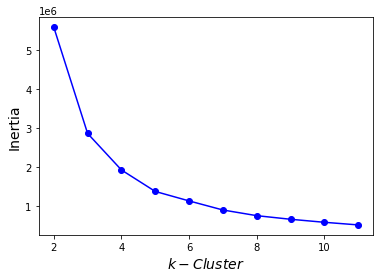

In [7]:
plt.plot(range(2, 12), inertias, "bo-")
plt.xlabel("$k-Cluster$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [23]:
n_clusters = 5
kmeans_cluster = KMeans(n_clusters=n_clusters)
labels = kmeans_cluster.fit_predict(df_hour_duration)

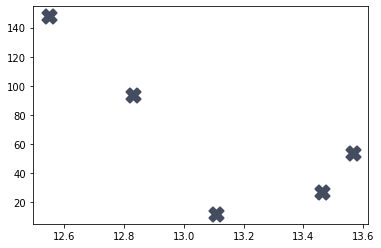

In [24]:
centroids = kmeans_cluster.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=2, c='#444d60')
plt.show()

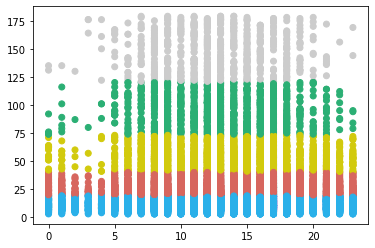

In [25]:
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#CCCCCC", 
                "#D2CA0D", "#522A64", "#A3DB05", "#FC6514"]

colors = [label_colors[i] for i in labels]

plt.scatter(df_hour_duration["hour"], df_hour_duration["trip_duration"], c=colors)